In [12]:
# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar import smooth_contours
from lunar.plot_glare_contours import plot_glare_contours
from lunar.identify_glare import clip_ends




In [13]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '25Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100 #used to decide if lights were on
threads = 2  


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


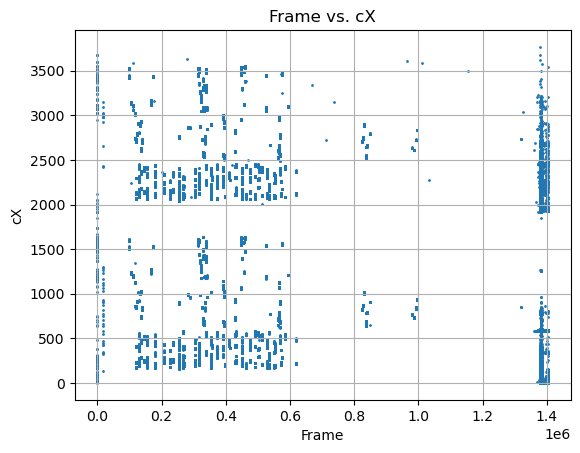

In [14]:
# Plot the contours data
output_file = 'contours_' + output_suffix
plot_contours(output_file)

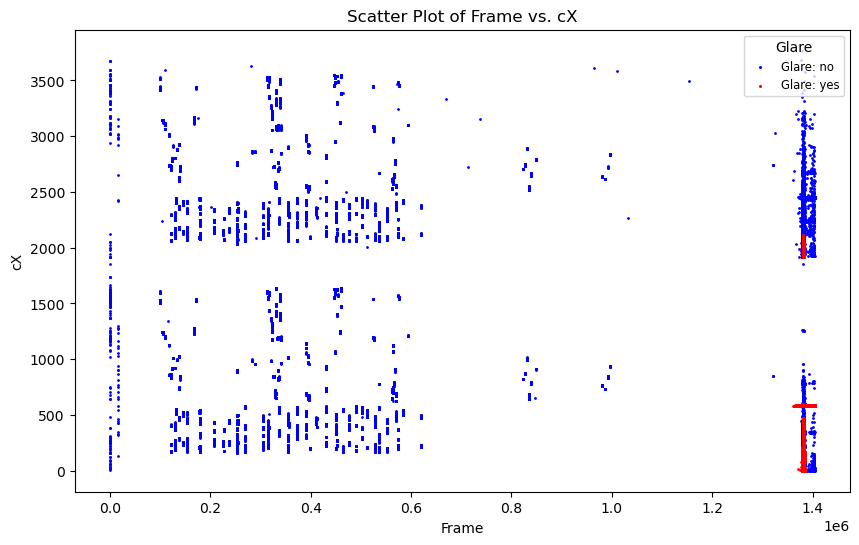

In [21]:
# Identify horizontal glare in contour file
# Not any glare in this so not a necessary step
#But note file names build upon each other
process_large_file(
    input_file='contours_' + output_suffix,
    output_file='glare_' + output_suffix,
    min_cluster_size=5000,
    eps=0.1,
    min_samples=50,
    chunksize=100000
)
# Plot the glare-processed results
plot_glare_contours('glare_' + output_suffix, color_by_cluster=False)  # Change last to True to color by cluster

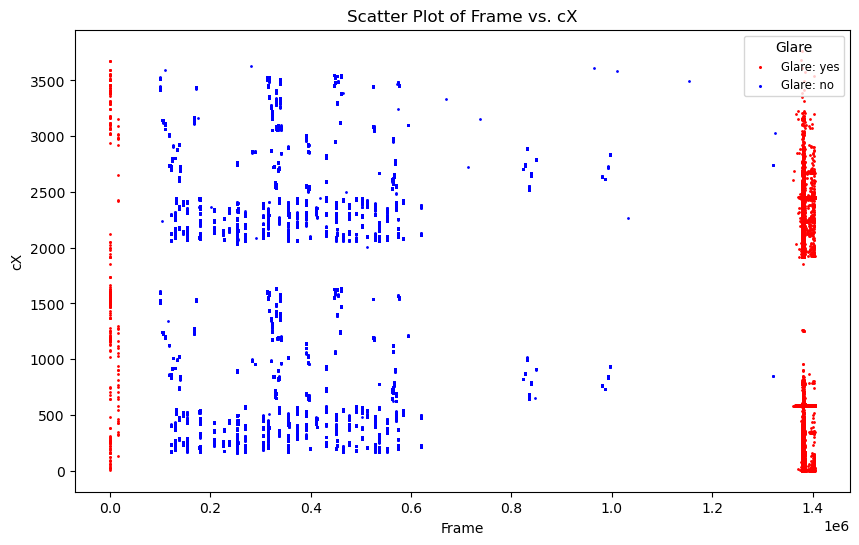

In [22]:
clip_ends(
    input_file = 'glare_' + output_suffix,
    output_file = 'vglare_' + output_suffix,
    low_clip = 20000,
    hi_clip = 1340000
)
# Plot the glare-processed results
plot_glare_contours('vglare_' + output_suffix, color_by_cluster=False)  # Change last to True to color by cluster

In [ ]:
# View y-axis values of contours, if necessary
import pandas as pd
import matplotlib.pyplot as plt

# Input the file name
input_file = 'glare_' + output_suffix  # Replace with your file name

# Read the tab-delimited file into a DataFrame
data = pd.read_csv(input_file, sep='\t')

# Ensure 'frame' and 'cY' columns are properly formatted as one-dimensional arrays
frame_values = data['frame'].values
cY_values = data['cY'].values

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(frame_values, cY_values, marker='o', color='b', s=3)  # 's' controls the size of the dots
plt.xlabel('Frame')
plt.ylabel('cY')
plt.xlim(None, None)    #Can change the range of the x-axis here
plt.title('Plot of cY vs. Frame')
plt.grid(True)
plt.show()



In [23]:
# Analyze the contours to label tanks
tank_boundaries = [164, 627, 1158, 1674, 2040, 2493, 3046, 3571]
analyze_contours('vglare_' + output_suffix, tank_boundaries)

Removed 119681 rows labeled as glare.
Analysis complete. Results saved to analyzed_vglare_25Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
277,98780,3422.0,543.0,19.5,201.0,255.0,229.310345,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank3,376.0
278,98779,1508.0,442.0,21.5,201.0,255.0,217.656250,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank3,350.0
279,98781,1508.0,446.0,18.5,202.0,246.0,224.333333,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank3,350.0
280,98781,3522.0,548.0,17.5,201.0,249.0,220.230769,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank3,476.0
281,98782,1604.0,443.0,20.0,201.0,228.0,212.758621,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank3,446.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76002,1320675,2740.0,781.0,19.5,201.0,245.0,227.137931,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,247.0
76003,1320678,848.0,708.0,17.0,206.0,255.0,228.692308,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,221.0
76004,1320678,2740.0,780.0,26.5,201.0,255.0,236.250000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,247.0
76005,1320679,2740.0,780.0,25.5,202.0,255.0,235.400000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,247.0


In [24]:
match_cameras(
    'analyzed_vglare_' + output_suffix,  # Input file
    'matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to matched_25Jul2024.tsv


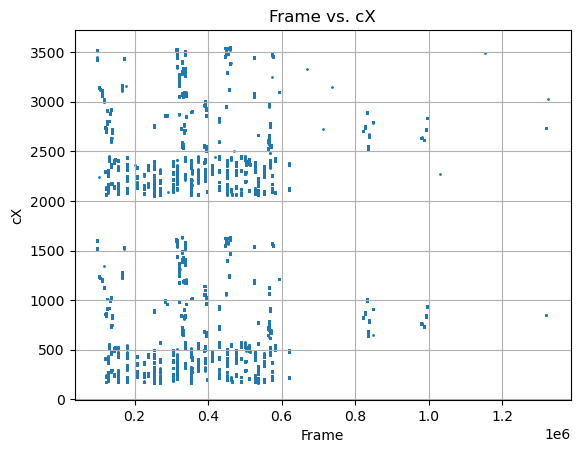

In [26]:
plot_contours('matched_' + output_suffix)

Smoothed data saved to smooth_25Jul2024.tsv
Plot saved to 25Jul2024.png


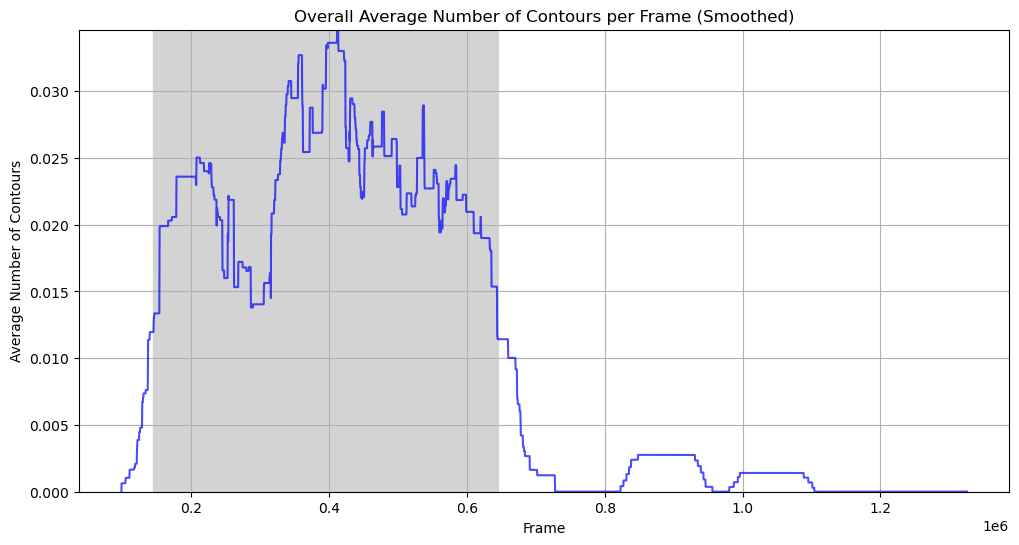

In [25]:
smooth_contours(
    input_file='matched_' + output_suffix,
    outfile_suffix = output_suffix,
    window=108000,
    pad=True,  #Pads beginning with zeros to not get edge artifact
    date='July 25, 2024'
)